Found 557 images belonging to 2 classes.
Found 140 images belonging to 2 classes.
Epoch 1/10
18/18 [==============================] - 31s 2s/step - loss: 0.4528 - accuracy: 0.7989 - val_loss: 0.3121 - val_accuracy: 0.8929
Epoch 2/10
18/18 [==============================] - 28s 2s/step - loss: 0.2093 - accuracy: 0.9354 - val_loss: 0.2296 - val_accuracy: 0.9429
Epoch 3/10
18/18 [==============================] - 27s 2s/step - loss: 0.1457 - accuracy: 0.9533 - val_loss: 0.1947 - val_accuracy: 0.9429
Epoch 4/10
18/18 [==============================] - 28s 2s/step - loss: 0.1181 - accuracy: 0.9659 - val_loss: 0.1865 - val_accuracy: 0.9357
Epoch 5/10
18/18 [==============================] - 28s 2s/step - loss: 0.0990 - accuracy: 0.9731 - val_loss: 0.1656 - val_accuracy: 0.9500
Epoch 6/10
18/18 [==============================] - 28s 2s/step - loss: 0.0860 - accuracy: 0.9785 - val_loss: 0.1749 - val_accuracy: 0.9500
Epoch 7/10
18/18 [==============================] - 28s 2s/step - loss: 0.0787

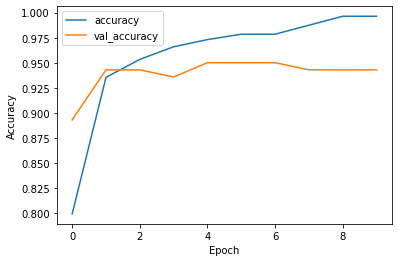

5/5 [==============================] - 6s 936ms/step - loss: 0.1455 - accuracy: 0.9429
Test accuracy: 0.9428571462631226


In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Step 1: Data Preparation
train_dir = 'train'  # Directory containing training images
valid_dir = 'test'  # Directory containing validation images

train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary')

valid_datagen = ImageDataGenerator(rescale=1./255)
valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary')

# Step 2: Model Building and Training
base_model = tf.keras.applications.MobileNetV2(input_shape=(224, 224, 3),
                                               include_top=False,
                                               weights='imagenet')
base_model.trainable = False

model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_generator,
                    epochs=10,
                    validation_data=valid_generator)

# Step 3: Model Evaluation
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate model on test set
loss, accuracy = model.evaluate(valid_generator)
print('Test accuracy:', accuracy)


In [8]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
# Save the trained model
model.save('cats_and_dogs_classifier.h5')

# Load the model
model = load_model('cats_and_dogs_classifier.h5')

# Function to prepare the image
def prepare_image(file_path):
    img = image.load_img(file_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Rescale by 1/255.
    return img_array

# Function to predict the class of the image
def predict_image(model, file_path):
    img_array = prepare_image(file_path)
    prediction = model.predict(img_array)
    if prediction[0] > 0.5:
        print("The image is a dog.")
    else:
        print("The image is a cat.")

# Example usage
file_path = 'test'
predict_image(model, file_path)

PermissionError: [Errno 13] Permission denied: 'test'